<a href="https://colab.research.google.com/github/Andrew9037/NKUST_ML_HW1/blob/main/mean_shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

參考資料來源: https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py
& https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [ ]:
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

生成樣本資料

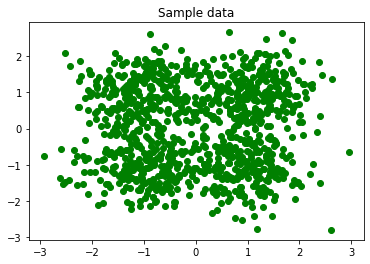

In [ ]:
centers = [[1,1],[-1,-1],[1,-1],[-1,1]] #樣本生成中心座標
X,_ = make_blobs( n_samples=1000, centers=centers, cluster_std=0.6) #生成樣本數1000,群類的標準差0.6
plt.title("Sample data")
plt.scatter(X[:, 0], X[:, 1], c = 'g')
plt.show()

使用mean-shift計算群類

In [ ]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500) #帶寬設置

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)      # bin_seeding=True,預設值為Flase,改設置為True將加速計算流程(使初始點內核的位置不是所有點的位置)
ms.fit(X)                               # fit(X), Perform clustering.
labels = ms.labels_                         # labels_, Labels of each point.
cluster_centers = ms.cluster_centers_               # cluster_centers_, Coordinates of cluster centers.  

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 4


繪製結果

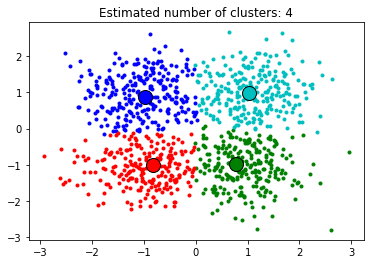

In [ ]:
plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()